In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [ ]:
#loading the datasets
mnist_train = datasets.MNIST(root='./datasets', train = True,transform = transforms.ToTensor(), download = True)

mnist_test = datasets.MNIST(root='./datasets', train = False,transform = transforms.ToTensor(), download = True)

len(mnist_test)


10000

5


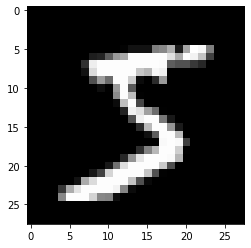

In [ ]:
#displaying the images
image,label = mnist_train[0]
image = image.reshape([28,28])
plt.imshow(image, cmap = 'gray')
print(label)

In [ ]:
mnist_train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle = True)

test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 100, shuffle = False)

In [ ]:
data_train_iter = iter(train_loader)
images, labels = data_train_iter.next()
print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [ ]:
x = images.view(-1, 28*28)

In [ ]:
len(x[10])

784

In [ ]:
W = torch.randn(784,10)/np.sqrt(784)
W.requires_grad_()

tensor([[ 0.0485,  0.0021, -0.0370,  ..., -0.0265, -0.0015, -0.0020],
        [-0.0473,  0.0362,  0.0032,  ..., -0.0222, -0.0183, -0.0151],
        [-0.0078,  0.0128,  0.0347,  ...,  0.0131,  0.0131, -0.0146],
        ...,
        [-0.0033, -0.0108, -0.0103,  ...,  0.0271,  0.0066, -0.0019],
        [ 0.0322, -0.0275,  0.0258,  ..., -0.0298,  0.0235,  0.0035],
        [-0.0097,  0.0340,  0.0223,  ..., -0.0309,  0.0086, -0.0584]],
       requires_grad=True)

In [ ]:
b = torch.randn(10, requires_grad=True)
b

tensor([ 1.3207,  0.5679,  0.7825, -1.2485,  0.3943, -2.7897,  0.9654,  0.7026,
        -1.9507, -2.8996], requires_grad=True)

In [ ]:
y = torch.matmul(x,W) + b
y[0,:]

tensor([ 1.7729,  0.1582,  0.5394, -1.4596,  0.4134, -2.9432,  1.3189,  0.6964,
        -1.8468, -3.2539], grad_fn=<SliceBackward0>)

In [ ]:
py = F.softmax(y,dim=1)
py[0]

tensor([0.3566, 0.0709, 0.1038, 0.0141, 0.0916, 0.0032, 0.2264, 0.1215, 0.0096,
        0.0023], grad_fn=<SelectBackward0>)

In [ ]:
lr = 0.01
optimizer = torch.optim.SGD([W,b],lr)

In [ ]:
cross_entropy = F.cross_entropy(y,labels)
cross_entropy.backward()

In [ ]:
b.grad

tensor([ 0.3251, -0.0526,  0.0175, -0.1426,  0.0442, -0.1166,  0.0706,  0.0113,
        -0.0703, -0.0866])

In [ ]:
optimizer.step()

In [ ]:
b

tensor([ 1.3174,  0.5684,  0.7823, -1.2471,  0.3939, -2.7885,  0.9647,  0.7024,
        -1.9500, -2.8987], requires_grad=True)

In [ ]:
# training cycle
for images,labels in train_loader:
  optimizer.zero_grad()
  x = images.view(-1, 28*28)
  y = torch.matmul(x,W) + b
  loss_func = F.cross_entropy(y,labels)
  loss_func.backward()
  optimizer.step()
  print(loss_func)

tensor(3.2477, grad_fn=<NllLossBackward0>)
tensor(3.2393, grad_fn=<NllLossBackward0>)
tensor(3.0056, grad_fn=<NllLossBackward0>)
tensor(2.6132, grad_fn=<NllLossBackward0>)
tensor(3.0111, grad_fn=<NllLossBackward0>)
tensor(2.8797, grad_fn=<NllLossBackward0>)
tensor(2.5765, grad_fn=<NllLossBackward0>)
tensor(3.0011, grad_fn=<NllLossBackward0>)
tensor(2.7606, grad_fn=<NllLossBackward0>)
tensor(2.5320, grad_fn=<NllLossBackward0>)
tensor(2.8304, grad_fn=<NllLossBackward0>)
tensor(2.7020, grad_fn=<NllLossBackward0>)
tensor(2.6308, grad_fn=<NllLossBackward0>)
tensor(2.8401, grad_fn=<NllLossBackward0>)
tensor(2.6437, grad_fn=<NllLossBackward0>)
tensor(2.6987, grad_fn=<NllLossBackward0>)
tensor(2.4879, grad_fn=<NllLossBackward0>)
tensor(2.4888, grad_fn=<NllLossBackward0>)
tensor(2.4081, grad_fn=<NllLossBackward0>)
tensor(2.3516, grad_fn=<NllLossBackward0>)
tensor(2.6489, grad_fn=<NllLossBackward0>)
tensor(2.3117, grad_fn=<NllLossBackward0>)
tensor(2.3639, grad_fn=<NllLossBackward0>)
tensor(2.56

In [ ]:
correct = 0
total = len(mnist_test)
with torch.no_grad():
  for images,labels in test_loader:
    x = images.view(-1, 28*28)
    y = torch.matmul(x,W) + b

    prediction = torch.argmax(y, dim=1)
    correct+=torch.sum((prediction == labels).float())

print('Test accuracy: {}'.format(correct/total))

Test accuracy: 0.8327999711036682


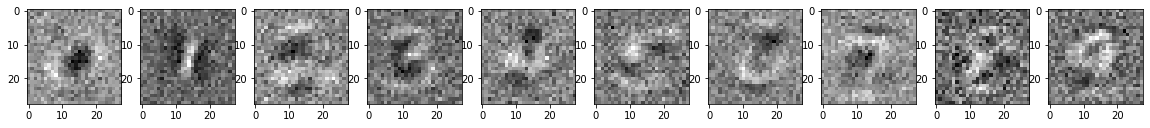

In [ ]:
fig, ax = plt.subplots(1,10, figsize = (20,2))

for digit in range(10):
  ax[digit].imshow(W[:,digit].detach().view(28,28), cmap = 'gray')